In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [4]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [5]:
R = Runner(verbose=False)

*** GP2 ***
Working directory: /tmp/tmpmgcxus4vGP2


In [5]:
# load our lucchi augmented dataset with flipped and rotated images (2640 images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/augmented_images_flip_rotate.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/augmented_masks_flip_rotate.npy')

In [6]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 20
R1 = Runner(verbose=False)
R1.setup_data(images, masks, dataset_size=2640, weights=weights)
RUNS = 10

*** GP2 ***
Working directory: /tmp/tmpibwfmu4uGP2
Weights OK!


In [7]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R1.run_classifier()
    R1.run_discriminator()
    l = R1.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R1.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Model saved to /tmp/tmpibwfmu4uGP2/unet_0.model
History saved to /tmp/tmpibwfmu4uGP2/history_0.pickle
Testing the classifier...
25/25 [==============================] - 2s 97ms/step - loss: 2.3119 - dice_coeff: 0.0983
Model saved to /tmp/tmpibwfmu4uGP2/cnnd_0.model
History saved to /tmp/tmpibwfmu4uGP2/cnnd_history_0.pickle
Testing the discriminator...
5/5 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 81 machine labels.
Replacing 16 from 81 !
D_relabeled_ 16
point ids 16
Removed: 16 Filled: 16
TOOK 631.7706696987152 seconds
***
RUN: 1
Model saved to /tmp/tmpibwfmu4uGP2/unet_1.model
History saved to /tmp/tmpibwfmu4uGP2/history_1.pickle
Testing the classifier...
25/25 [==============================] - 2s 96ms/step - loss: 1.6355 - dice_coeff: 0.1111
Testing the discriminator...
5/5 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 77 machine labels.
Replacing 15 from 77 !
D_relabeled_ 15
po

In [8]:
R1.classifier_scores

[[2.311944007873535, 0.09826469421386719],
 [1.6354984045028687, 0.11108389496803284],
 [1.5500478744506836, 0.11577145755290985],
 [1.5122466087341309, 0.11775319278240204],
 [1.4701883792877197, 0.12016085535287857]]

In [9]:
R1.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [4.858669757843018, 0.9746835231781006],
 [539.4617309570312, 0.4683544337749481]]

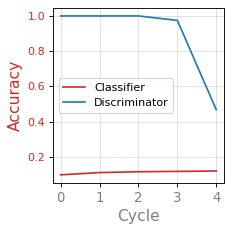

In [10]:
R1.plot()